In [1]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]], dtype=int64)

* 정확도

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9121265377855887

* 정밀도

In [6]:
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.900990099009901

* 재현율

In [7]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.8584905660377359

* F1 score

In [8]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [44]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
pred_proba_1 =  pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=0.1)
y_pred2 = binarizer.transform(pred_proba_1)

In [46]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
confusion = confusion_matrix(y, y_pred2)
accuracy = accuracy_score(y, y_pred2)
precision = precision_score(y, y_pred2)
recall = recall_score(y, y_pred2)


print(confusion)
print(accuracy)
print(precision)
print(recall)

f1_score(y,y_pred2) # numpy 해결이 안됨..

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472


TypeError: 'numpy.float64' object is not callable

In [ ]:
f1_score = f1_score(y, y_pred2)
print('혼동행렬:{0:.4f}, 정확도:{1:.4f}, 정밀도:{2:.4f}, 재현율:{3:.4f}, f1 score:{4:.4f}'.format(confusion, accuracy, precision, recall, f1_score))

* ROC 곡선 시각화

In [36]:
from sklearn.metrics import roc_curve 

pred_proba_class1 = model_lor.predict_proba(X)[:,1]

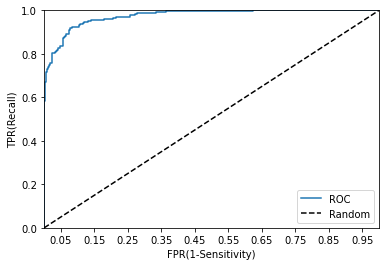

In [37]:
import matplotlib.pyplot as plt 

def roc_curve_plot(y, pred_proba_class1):
    fprs, tprs, thresholds = roc_curve(y, pred_proba_class1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1],'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y, pred_proba[:,1])

* ROC AUC 값

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, pred_proba_class1)

0.9741689128481581